In [29]:
#Exercício 2

from jax import grad
import jax.numpy as jnp

def metodo_newton(f, df, x0, limite, tol):
    xk = x0
    k = 0
    for k in range(limite):
        fx = f(xk)
    
        if (abs(fx) < tol):
            break

        dfx = df(xk)
        if dfx == 0:
            raise ValueError("Derivada zero. O método de Newton falhou.")
        
        xk = xk - fx / dfx

    return xk, k


def f(x):
     return jnp.exp(x) + 2.0**(-x) + 2.0*jnp.cos(x) - 6.0
    
df = grad(f)

a, b = 1.0, 2.0
x0 = (a + b) / 2.0
tolerancia = 1e-6

raiz, passos = metodo_newton(f, df, x0, 100, tolerancia)
print(f"Raiz encontrada: {raiz:.6f}\nNúmero de passos: {passos}")


Raiz encontrada: 1.829383
Número de passos: 4


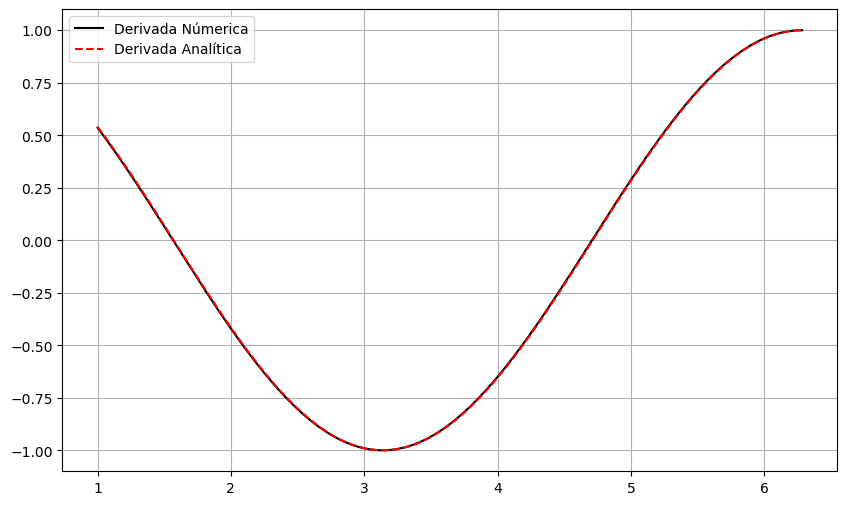

In [29]:
#exercico 1 a)
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def f(x): #funcao desejada
    return np.sin(x)

def g(x): #derivada exata da funcao 
    return np.cos(x)

n = 1000
x = np.linspace(1,2*pi,n)
h = 0.01
solucao = np.zeros(n)


for i in range(n):
    solucao[i] = ((f(float(x[i])+h)-f(x[i]))/h)
    



plt.figure(figsize=(10,6))
plt.plot(x,solucao,"black",linewidth = '1.5', label = "Derivada Númerica")
plt.plot(x,g(x),'--',color = 'red',linewidth = '1.5' , label = "Derivada Analítica")
plt.grid(True)
plt.legend()
plt.show()



Derivada Numérica proressiva: 0.536085981011869
Derivada Exata: 0.5403023058681398
Erro: 0.00421632485627077
Derivada Numérica central : 0.5402933008747335
Derivada Exata: 0.5403023058681398
Erro: 9.004993406280803e-06


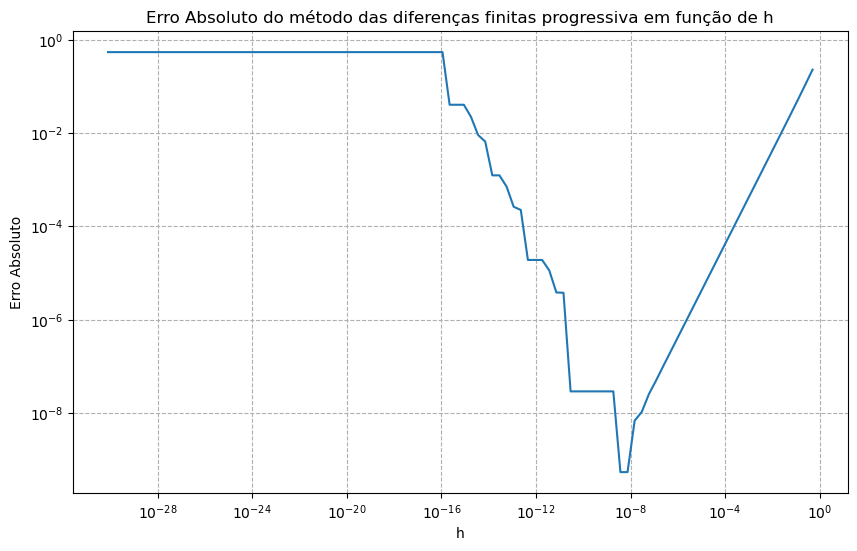

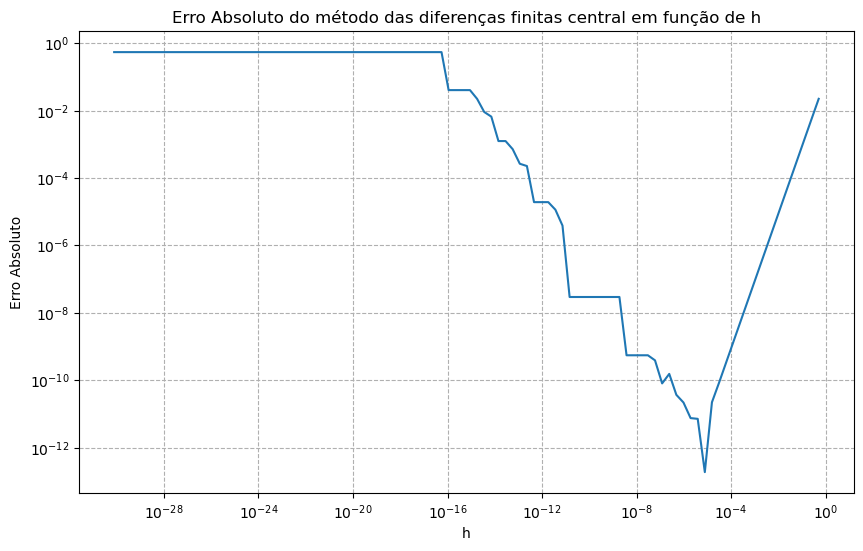

In [ ]:
#exercicio 1 a) corrigido 
from math import sin,cos,pow
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return sin(x)
def g(x):
    return cos(x)

x = 1
h = 0.01

dfp = (f(x+h) - f(x) )/h
erro  = abs(g(x) - dfp)
print("Derivada Numérica proressiva:", dfp)
print("Derivada Exata:", g(x))
print("Erro:", erro)
# b)
hInicial = 0.5
n = 100
hValores = np.zeros(n)
erroAbs = np.zeros(n) 
for i in range (n):
    hValores[i] = pow(hInicial,i+1)
    dfp = (f(x+hValores[i]) - f(x)) / hValores[i]
    erroAbs[i] = np.abs(g(x) - dfp)



plt.figure(figsize=(10,6))
plt.title("Erro Absoluto do método das diferenças finitas progressiva em função de h")
plt.loglog(hValores,erroAbs)
plt.grid(True ,which="both", linestyle='--')
plt.xlabel("h")
plt.ylabel("Erro Absoluto")


#d)


dfc = (f(x+h) - f(x-h) )/(2*h)
erroDfc  = abs(g(x) - dfc)
print("Derivada Numérica central :", dfc)
print("Derivada Exata:", g(x))
print("Erro:", erroDfc)


hValoresDfc = np.zeros(n) 
erroAbsDfc = np.zeros(n)
for i in range(n):
    hValoresDfc[i] = pow(hInicial,i+1)
    dfc = (f(x+hValoresDfc[i]) - f(x-hValoresDfc[i]) )/(2*hValoresDfc[i])
    erroAbsDfc[i] = np.abs(g(x) - dfc)


plt.figure(figsize=(10,6))
plt.title("Erro Absoluto do método das diferenças finitas central em função de h")
plt.loglog(hValoresDfc,erroAbsDfc)
plt.grid(True ,which="both", linestyle='--')
plt.xlabel("h")
plt.ylabel("Erro Absoluto")
plt.show()



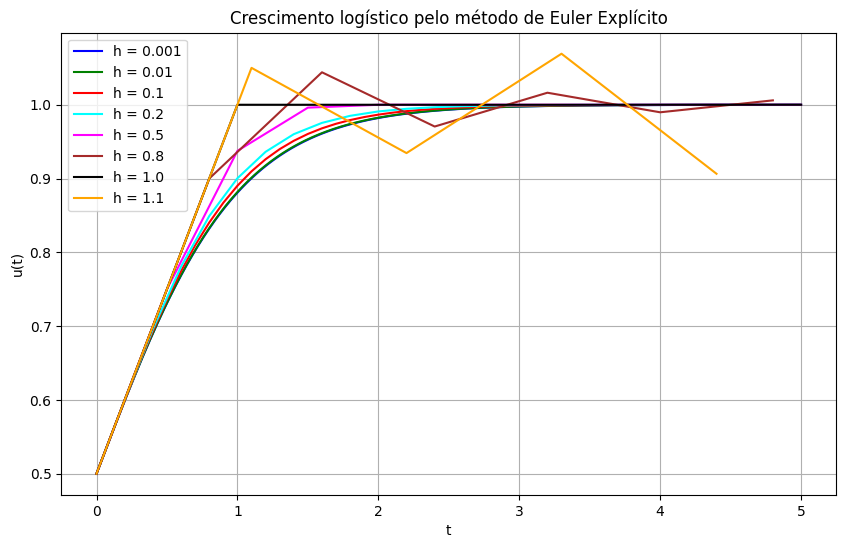

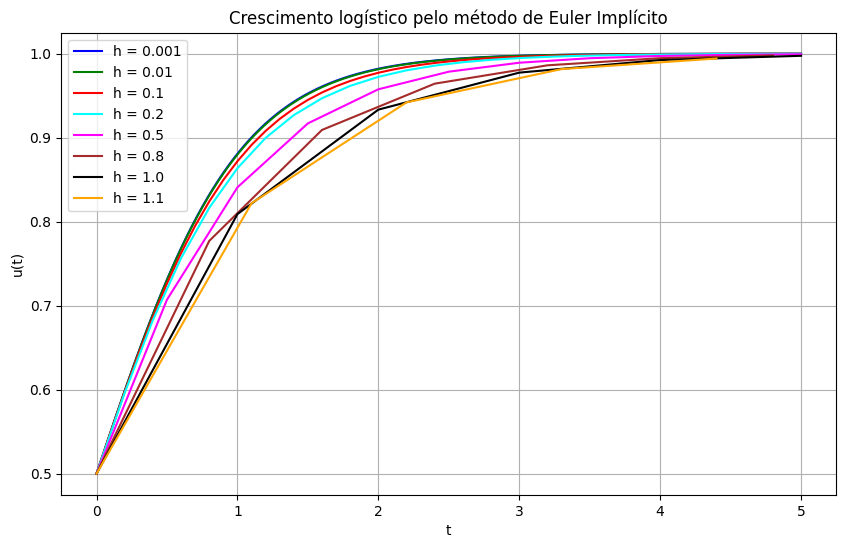

In [31]:
#Exercício 3, euler explícito


def euler_explicito(f, t0, tf, h, y0):
    N = int((tf - t0) / h)
    
    t_values = [t0]
    y_values = [y0]

    for i in range(N):
        prev = y0
        y0 = y0 + h * f(y0, t0)
        t0 = t0 + h
        t_values.append(t0)
        y_values.append(y0)


    return t_values, y_values




def euler_implicito(f, df, t0, tf, h, y0, tol, limite):
        N = int((tf - t0) / h)
        t_values = [t0]
        y_values = [y0]


        for i in range (int(N)):
            t_next = t0 + h

            G = lambda y: y - y0 - h * f(y, t_next)

            dGdy = lambda y: 1 - h * df(y, t_next)

            x0 = y0 + h * f(y0, t0)  # chute inicial preditivo para o método de Newton

            y0, k = metodo_newton(G, dGdy, x0, limite, tol=tol)

            if(k == limite -1):
                print(f"Warning: Newton's method did not converge at step {i+1}")
                break

            t0 = t_next
            t_values.append(t0)
            y_values.append(y0)

        return t_values, y_values





def f(u, t):
    return 2.0*(u - u**2.0)

df = grad(f)  # Derivada em relação a u

valores_h = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 1.1]
y0 = 0.5
t0, tf = 0.0, 5.0



cores = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown', 'black', 'orange']
plt.figure(figsize=(10, 6))

for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_explicito(f, t0, tf, h, y0)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Explícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize=(10, 6))
for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_implicito(f, df, t0, tf, h, y0, tol=1e-6, limite=100)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Implícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()


In [32]:
#Exercício 3, parte 2
